In [2]:
# need to enable iterative imputer explicitly since its still experimental
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer
import seaborn as sns
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
import numpy as np
import openpyxl

In [3]:
# import full dataset
data = pd.read_csv('./csv_data/INS-W_1/FeatureData/sleep.csv')
data.drop(columns=['Unnamed: 0'], inplace=True)
data.set_index(['pid','date'])
data.head(10)

,pid,date,f_slp:fitbit_sleep_summary_rapids_sumdurationafterwakeupmain:14dhist,f_slp:fitbit_sleep_summary_rapids_sumdurationasleepmain:14dhist,f_slp:fitbit_sleep_summary_rapids_sumdurationawakemain:14dhist,f_slp:fitbit_sleep_summary_rapids_sumdurationtofallasleepmain:14dhist,f_slp:fitbit_sleep_summary_rapids_sumdurationinbedmain:14dhist,f_slp:fitbit_sleep_summary_rapids_avgefficiencymain:14dhist,f_slp:fitbit_sleep_summary_rapids_avgdurationafterwakeupmain:14dhist,f_slp:fitbit_sleep_summary_rapids_avgdurationasleepmain:14dhist,f_slp:fitbit_sleep_summary_rapids_avgdurationawakemain:14dhist,f_slp:fitbit_sleep_summary_rapids_avgdurationtofallasleepmain:14dhist,f_slp:fitbit_sleep_summary_rapids_avgdurationinbedmain:14dhist,f_slp:fitbit_sleep_summary_rapids_countepisodemain:14dhist,f_slp:fitbit_sleep_summary_rapids_firstbedtimemain:14dhist,f_slp:fitbit_sleep_summary_rapids_lastbedtimemain:14dhist,f_slp:fitbit_sleep_summary_rapids_firstwaketimemain:14dhist,f_slp:fitbit_sleep_summary_rapids_lastwaketimemain:14dhist,f_slp:fitbit_sleep_intraday_rapids_avgdurationasleepunifiedmain:14dhist,f_slp:fitbit_sleep_intraday_rapids_avgdurationawakeunifiedmain:14dhist,f_slp:fitbit_sleep_intraday_rapids_maxdurationasleepunifiedmain:14dhist,f_slp:fitbit_sleep_intraday_rapids_maxdurationawakeunifiedmain:14dhist,f_slp:fitbit_sleep_intraday_rapids_sumdurationasleepunifiedmain:14dhist,f_slp:fitbit_sleep_intraday_rapids_sumdurationawakeunifiedmain:14dhist,f_slp:fitbit_sleep_intraday_rapids_countepisodeasleepunifiedmain:14dhist,f_slp:fitbit_sleep_intraday_rapids_countepisodeawakeunifiedmain:14dhist,f_slp:fitbit_sleep_intraday_rapids_stddurationasleepunifiedmain:14dhist,f_slp:fitbit_sleep_intraday_rapids_stddurationawakeunifiedmain:14dhist,f_slp:fitbit_sleep_intraday_rapids_mindurationasleepunifiedmain:14dhist,f_slp:fitbit_sleep_intraday_rapids_mindurationawakeunifiedmain:14dhist,f_slp:fitbit_sleep_intraday_rapids_mediandurationasleepunifiedmain:14dhist,f_slp:fitbit_sleep_intraday_rapids_mediandurationawakeunifiedmain:14dhist,f_slp:fitbit_sleep_intraday_rapids_ratiocountasleepunifiedwithinmain:14dhist,f_slp:fitbit_sleep_intraday_rapids_ratiocountawakeunifiedwithinmain:14dhist,f_slp:fitbit_sleep_intraday_rapids_ratiodurationasleepunifiedwithinmain:14dhist,f_slp:fitbit_sleep_intraday_rapids_ratiodurationawakeunifiedwithinmain:14dhist,f_slp:fitbit_sleep_summary_rapids_sumdurationafterwakeupmain_dis:14dhist,f_slp:fitbit_sleep_summary_rapids_sumdurationasleepmain_dis:14dhist,f_slp:fitbit_sleep_summary_rapids_sumdurationawakemain_dis:14dhist,f_slp:fitbit_sleep_summary_rapids_sumdurationtofallasleepmain_dis:14dhist,...,f_slp:fitbit_sleep_intraday_rapids_mediandurationasleepunifiedmain_dis:weekend,f_slp:fitbit_sleep_intraday_rapids_mediandurationawakeunifiedmain_dis:weekend,f_slp:fitbit_sleep_intraday_rapids_ratiocountasleepunifiedwithinmain_dis:weekend,f_slp:fitbit_sleep_intraday_rapids_ratiocountawakeunifiedwithinmain_dis:weekend,f_slp:fitbit_sleep_intraday_rapids_ratiodurationasleepunifiedwithinmain_dis:weekend,f_slp:fitbit_sleep_intraday_rapids_ratiodurationawakeunifiedwithinmain_dis:weekend,f_slp:fitbit_sleep_summary_rapids_sumdurationafterwakeupmain_norm:weekend,f_slp:fitbit_sleep_summary_rapids_sumdurationasleepmain_norm:weekend,f_slp:fitbit_sleep_summary_rapids_sumdurationawakemain_norm:weekend,f_slp:fitbit_sleep_summary_rapids_sumdurationtofallasleepmain_norm:weekend,f_slp:fitbit_sleep_summary_rapids_sumdurationinbedmain_norm:weekend,f_slp:fitbit_sleep_summary_rapids_avgefficiencymain_norm:weekend,f_slp:fitbit_sleep_summary_rapids_avgdurationafterwakeupmain_norm:weekend,f_slp:fitbit_sleep_summary_rapids_avgdurationasleepmain_norm:weekend,f_slp:fitbit_sleep_summary_rapids_avgdurationawakemain_norm:weekend,f_slp:fitbit_sleep_summary_rapids_avgdurationtofallasleepmain_norm:weekend,f_slp:fitbit_sleep_summary_rapids_avgdurationinbedmain_norm:weekend,f_slp:fitbit_sleep_summary_rapids_countepisodemain_norm:weekend,f_slp:fitbit_sleep_summary_rapids_firstbedtimema

In [ ]:
# split data test/train
from sklearn.model_selection import train_test_split
train, test = train_test_split(data, test_size=0.33, random_state=1)

c:\Users\darkenral\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\_array_api.py:776: RuntimeWarning: All-NaN slice encountered
  return xp.asarray(numpy.nanmin(X, axis=axis))
c:\Users\darkenral\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\_array_api.py:793: RuntimeWarning: All-NaN slice encountered
  return xp.asarray(numpy.nanmax(X, axis=axis))


<Axes: >

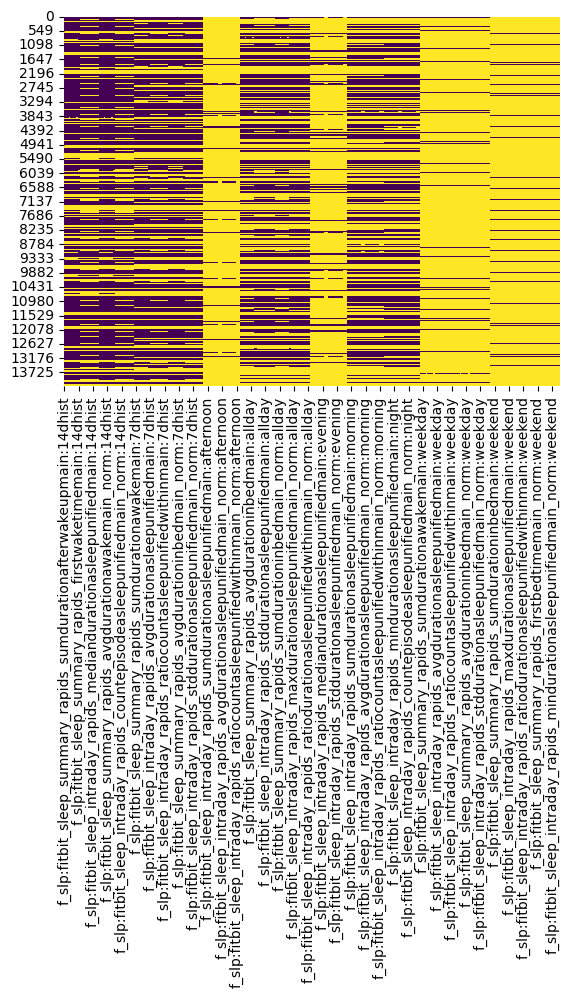

In [3]:
# Normalize the data
scaler = MinMaxScaler()
data_numeric = data.select_dtypes(include=[float])
data_normalized = pd.DataFrame(scaler.fit_transform(data_numeric), columns=data_numeric.columns)
data_normalized = data_normalized.dropna(axis=1, how='all')
data_normalized.head(10)
# data_normalized = data_normalized.to_numpy()
sns.heatmap(data_normalized.isna(), cbar=False, cmap='viridis')

In [ ]:
# Define imputer
imputer = IterativeImputer(random_state=100, max_iter=10)

# fit on the dataset
imputer.fit(data_normalized)

df_imputed = imputer.transform(data_normalized)
df_imputed[:10]

c:\Users\darkenral\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\impute\_iterative.py:895: ConvergenceWarning: [IterativeImputer] Early stopping criterion not reached.
  warnings.warn(


array([[0.        , 0.04351097, 0.00514684, ..., 0.56699105, 0.54632555,
        0.45367366],
       [0.        , 0.09304075, 0.01695428, ..., 0.5669504 , 0.5462487 ,
        0.45375115],
       [0.01182033, 0.1646395 , 0.02573418, ..., 0.56694284, 0.54628291,
        0.45371717],
       ...,
       [0.01182033, 0.46846395, 0.05540418, ..., 0.5669381 , 0.54626951,
        0.45373131],
       [0.01182033, 0.5322884 , 0.06569785, ..., 0.56695372, 0.54628049,
        0.4537194 ],
       [0.01182033, 0.60677116, 0.08325764, ..., 0.56694748, 0.54628407,
        0.45371606]])

In [40]:
df_imputed = pd.DataFrame.from_records(df_imputed)
df_imputed.head(10)

,0,1,2,3,4,5,6,7,8,9,...,474,475,476,477,478,479,480,481,482,483
0,0.00000,0.043511,0.005147,0.0,0.042262,0.905660,0.000000,0.458388,0.058991,0.0,...,0.402697,0.382333,0.546268,0.471368,0.364929,0.400837,0.433009,0.566991,0.546326,0.453674
1,0.00000,0.093041,0.016954,0.0,0.092651,0.867925,0.000000,0.490092,0.097161,0.0,...,0.363504,0.379302,0.578750,0.538507,0.410925,0.400874,0.433050,0.566950,0.546249,0.453751
2,0.01182,0.164639,0.025734,0.0,0.162893,0.880503,0.045045,0.578159,0.098318,0.0,...,0.394556,0.389392,0.545750,0.496293,0.378748,0.472323,0.433057,0.566943,0.546283,0.453717
3,0.01182,0.209028,0.030276,0.0,0.205736,0.891509,0.033784,0.550528,0.086751,0.0,...,0.377911,0.368246,0.521332,0.484432,0.367132,0.511464,0.428726,0.571285,0.548977,0.451028
4,0.01182,0.283887,0.040266,0.0,0.278881,0.894340,0.027027,0.598151,0.092303,0.0,...,0.398364,0.395129,0.530967,0.491152,0.382989,0.410204,0.433063,0.566937,0.546252,0.453748
5,0.01182,0.339687,0.049046,0.0,0.333914,0.893082,0.022523,0.596433,0.093691,0.0,...,0.361590,0.321459,0.500000,0.500000,0.318790,0.384615,0.288798,0.711202,0.557283,0.442717
6,0.01182,0.417053,0.051468,0.0,0.406479,0.905660,0.019305,0.627666,0.084272,0.0,...,0.398425,0.376886,0.522227,0.496971,0.375015,0.437381,0.433047,0.566953,0.546267,0.453734
7,0.01182,0.468464,0.055404,0.0,0.455590,0.910377,0.016892,0.616909,0.079377,0.0,...,0.380561,0.360474,0.592440,0.492279,0.458817,0.398248,0.433061,0.566938,0.546270,0.453731
8,0.01182,0.532288,0.065698,0.0,0.518635,0.907757,0.015015,0.623074,0.083666,0.0,...,0.388983,0.378928,0.510969,0.499949,0.390482,0.415755,0.433046,0.566954,0.546280,0.453719
9,0.01182,0.606771,0.083258,0.0,0.595495,0.900000,0.013514,0.639234,0.095426,0.0,...,0.402933,0.402252,0.531694,0.506307,0.386150,0.483581,0.433054,0.566947,0.546284,0.453716


In [46]:
df_imputed.columns = data_normalized.columns
df_imputed.head(20)

,f_slp:fitbit_sleep_summary_rapids_sumdurationafterwakeupmain:14dhist,f_slp:fitbit_sleep_summary_rapids_sumdurationasleepmain:14dhist,f_slp:fitbit_sleep_summary_rapids_sumdurationawakemain:14dhist,f_slp:fitbit_sleep_summary_rapids_sumdurationtofallasleepmain:14dhist,f_slp:fitbit_sleep_summary_rapids_sumdurationinbedmain:14dhist,f_slp:fitbit_sleep_summary_rapids_avgefficiencymain:14dhist,f_slp:fitbit_sleep_summary_rapids_avgdurationafterwakeupmain:14dhist,f_slp:fitbit_sleep_summary_rapids_avgdurationasleepmain:14dhist,f_slp:fitbit_sleep_summary_rapids_avgdurationawakemain:14dhist,f_slp:fitbit_sleep_summary_rapids_avgdurationtofallasleepmain:14dhist,...,f_slp:fitbit_sleep_intraday_rapids_stddurationasleepunifiedmain_norm:weekend,f_slp:fitbit_sleep_intraday_rapids_stddurationawakeunifiedmain_norm:weekend,f_slp:fitbit_sleep_intraday_rapids_mindurationasleepunifiedmain_norm:weekend,f_slp:fitbit_sleep_intraday_rapids_mindurationawakeunifiedmain_norm:weekend,f_slp:fitbit_sleep_intraday_rapids_mediandurationasleepunifiedmain_norm:weekend,f_slp:fitbit_sleep_intraday_rapids_mediandurationawakeunifiedmain_norm:weekend,f_slp:fitbit_sleep_intraday_rapids_ratiocountasleepunifiedwithinmain_norm:weekend,f_slp:fitbit_sleep_intraday_rapids_ratiocountawakeunifiedwithinmain_norm:weekend,f_slp:fitbit_sleep_intraday_rapids_ratiodurationasleepunifiedwithinmain_norm:weekend,f_slp:fitbit_sleep_intraday_rapids_ratiodurationawakeunifiedwithinmain_norm:weekend
0,0.000000,0.043511,0.005147,0.0,0.042262,0.905660,0.000000,0.458388,0.058991,0.0,...,0.402697,0.382333,0.546268,0.471368,0.364929,0.400837,0.433009,0.566991,0.546326,0.453674
1,0.000000,0.093041,0.016954,0.0,0.092651,0.867925,0.000000,0.490092,0.097161,0.0,...,0.363504,0.379302,0.578750,0.538507,0.410925,0.400874,0.433050,0.566950,0.546249,0.453751
2,0.011820,0.164639,0.025734,0.0,0.162893,0.880503,0.045045,0.578159,0.098318,0.0,...,0.394556,0.389392,0.545750,0.496293,0.378748,0.472323,0.433057,0.566943,0.546283,0.453717
3,0.011820,0.209028,0.030276,0.0,0.205736,0.891509,0.033784,0.550528,0.086751,0.0,...,0.377911,0.368246,0.521332,0.484432,0.367132,0.511464,0.428726,0.571285,0.548977,0.451028
4,0.011820,0.283887,0.040266,0.0,0.278881,0.894340,0.027027,0.598151,0.092303,0.0,...,0.398364,0.395129,0.530967,0.491152,0.382989,0.410204,0.433063,0.566937,0.546252,0.453748
5,0.011820,0.339687,0.049046,0.0,0.333914,0.893082,0.022523,0.596433,0.093691,0.0,...,0.361590,0.321459,0.500000,0.500000,0.318790,0.384615,0.288798,0.711202,0.557283,0.442717
6,0.011820,0.417053,0.051468,0.0,0.406479,0.905660,0.019305,0.627666,0.084272,0.0,...,0.398425,0.376886,0.522227,0.496971,0.375015,0.437381,0.433047,0.566953,0.546267,0.453734
7,0.011820,0.468464,0.055404,0.0,0.455590,0.910377,0.016892,0.616909,0.079377,0.0,...,0.380561,0.360474,0.592440,0.492279,0.458817,0.398248,0.433061,0.566938,0.546270,0.453731
8,0.011820,0.532288,0.065698,0.0,0.518635,0.907757,0.015015,0.623074,0.083666,0.0,...,0.388983,0.378928,0.510969,0.499949,0.390482,0.415755,0.433046,0.566954,0.546280,0.453719
9,0.011820,0.606771,0.083258,0.0,0.595495,0.900000,0.013514,0.639234,0.095426,0.0,...,0.402933,0.402252,0.531694,0.506307,0.386150,0.483581,0.433054,0.566947,0.546284,0.453716


<Axes: >

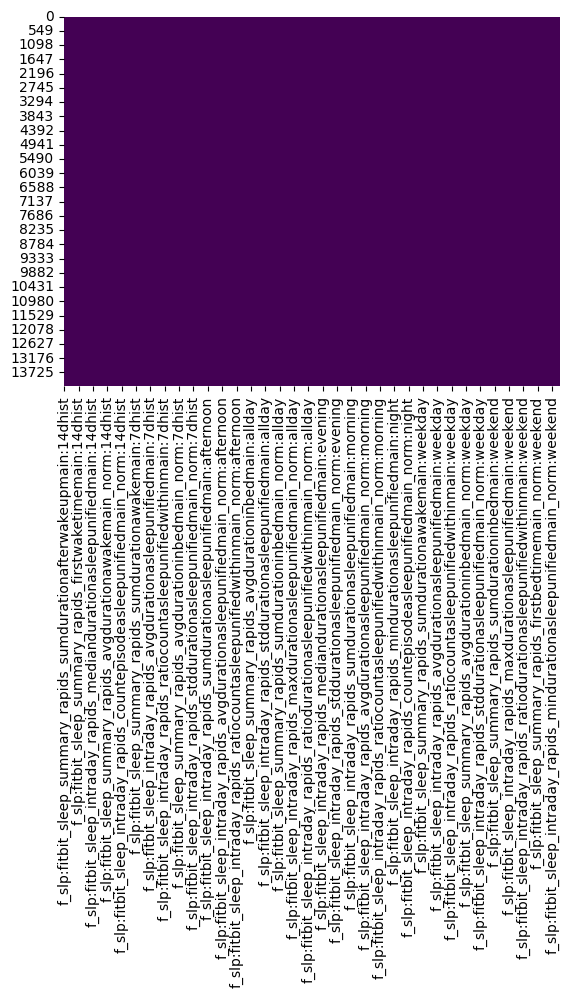

In [ ]:
sns.heatmap(df_imputed.isnull(), cbar=False, cmap='viridis')

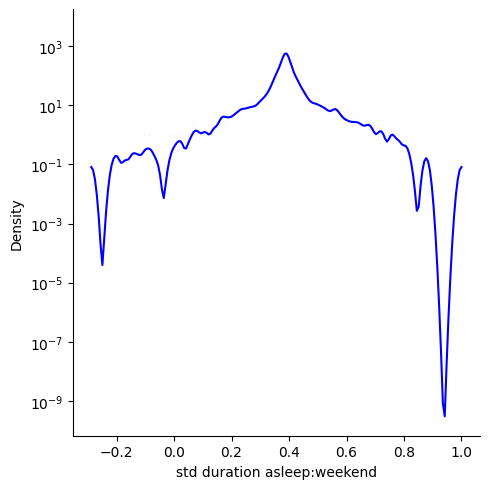

In [60]:
plot = sns.displot(df_imputed['f_slp:fitbit_sleep_intraday_rapids_stddurationasleepunifiedmain_norm:weekend'], kde=True, log_scale=[False,10], color='blue')
plot.set_axis_labels("std duration asleep:weekend", "Density")